In [587]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [588]:
df_sdr_2023 = pd.read_csv('https://raw.githubusercontent.com/Dieg-host/Hackathon_Los_Ganadores/refs/heads/main/sustainable_development_report_2023.csv')
df_sdg_index = pd.read_csv('https://raw.githubusercontent.com/Dieg-host/Hackathon_Los_Ganadores/refs/heads/main/sdg_index_2000-2022.csv')


In [589]:
df_sdr_2023.head()

,country_code,country,region,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,FIN,Finland,OECD,86.760595,99.5750,60.886750,95.386385,97.169333,92.11125,94.3276,...,86.789000,95.995714,98.4685,91.233750,60.059571,68.793667,87.928000,85.0700,92.521091,75.60100
1,SWE,Sweden,OECD,85.981397,98.8885,63.074125,96.904000,99.761667,91.44025,95.0576,...,84.966429,97.586286,94.9650,90.389250,56.830571,70.031000,69.348667,80.1882,88.508455,85.77025
2,DNK,Denmark,OECD,85.683637,99.2155,71.025250,95.398500,99.339667,86.99800,90.7316,...,87.562429,96.984857,98.1560,93.038500,44.571714,60.780667,76.303333,92.7924,93.844909,82.14800
3,DEU,Germany,OECD,83.358447,99.5105,72.366000,93.039357,97.162667,81.92025,88.4434,...,86.967286,95.788429,88.1470,90.096500,55.412857,64.002000,73.996000,79.2318,89.457545,84.39025
4,AUT,Austria,OECD,82.280189,99.4510,73.067500,92.468000,97.914333,84.57925,92.1636,...,83.274143,96.982143,94.6345,92.473667,49.623286,57.332000,NaN,73.5836,87.911455,71.13025


In [590]:
df_sdg_index.head()

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,AFG,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,AFG,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,AFG,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,AFG,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2


In [591]:
df_sdg_index.describe()

,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
count,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,2011.000000,63.685435,64.815628,57.735531,64.045652,71.990048,55.803309,63.963188,57.340966,69.839493,37.114444,52.369662,69.931739,79.680338,81.925870,48.565097,64.662802,62.194903,55.538720
std,6.634051,10.776469,36.098836,11.121524,22.354993,26.561757,17.281101,15.362064,21.490869,10.004358,25.883834,31.254386,18.171193,16.732118,21.346259,28.007749,13.408318,14.568598,13.017388
min,2000.000000,36.000000,0.000000,7.700000,5.900000,0.000000,3.500000,11.300000,0.100000,38.400000,0.000000,0.000000,13.800000,32.900000,0.000000,0.000000,26.000000,27.900000,15.100000
25%,2005.000000,55.075000,31.500000,52.400000,44.800000,57.375000,43.200000,52.300000,41.300000,64.100000,15.700000,23.900000,55.600000,69.400000,72.800000,42.200000,55.100000,51.600000,46.000000
50%,2011.000000,65.100000,81.000000,58.900000,70.200000,80.600000,57.500000,64.400000,64.450000,70.000000,29.700000,53.850000,75.000000,84.800000,90.900000,59.000000,64.400000,61.000000,54.900000
75%,2017.000000,72.000000,98.600000,65.300000,81.300000,94.400000,68.700000,74.300000,72.000000,76.400000,52.700000,79.925000,84.600000,94.100000,97.200000,67.200000,73.900000,73.500000,64.900000
max,2022.000000,86.800000,100.000000,83.400000,97.300000,100.000000,94.000000,95.100000,99.600000,93.600000,99.200000,100.000000,99.900000,99.000000,99.900000,91.200000,97.900000,96.000000,100.000000


In [592]:
df_sdr_2023.describe()

,overall_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
count,166.000000,151.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,149.000000,166.000000,166.000000,166.000000,126.000000,166.000000,166.000000,166.000000
mean,67.549197,75.234401,59.799100,69.694078,76.512968,63.285420,66.710744,61.413598,71.952935,51.600648,62.917889,72.181106,79.775904,82.119387,65.494968,66.637486,61.546404,60.954819
std,10.295499,31.169948,10.620853,20.354575,23.181919,16.399691,14.091641,20.364351,10.592308,26.561680,27.348955,18.215526,16.092924,21.175602,11.475977,14.175602,15.517449,12.991856
min,38.676086,0.000000,19.805800,12.952714,1.232250,13.054750,32.600000,8.697000,39.535000,1.654833,0.000000,13.826250,37.729429,0.000000,36.579400,26.477500,29.438000,29.350000
25%,60.547488,55.779250,54.007188,51.860089,61.417938,51.046250,55.237250,47.521312,66.426857,30.206464,41.608000,59.969813,68.592464,72.543000,57.647625,56.606900,49.029477,50.854917
50%,69.376528,93.300500,61.027500,75.437629,84.772875,65.869875,67.878000,68.612750,73.157643,48.168798,69.700500,76.851500,84.566024,90.903000,65.412250,66.295700,60.908687,60.805000
75%,74.947511,98.950750,67.264335,85.524428,95.644063,76.137000,76.044200,74.364000,79.626036,74.713036,84.612500,86.499437,94.084750,96.710875,72.992375,76.585000,73.716061,71.647188
max,86.760595,100.000000,83.401125,97.115143,99.761667,94.021667,95.057600,99.550750,93.382750,99.128857,100.000000,99.858000,98.811200,99.925333,90.394750,97.849000,93.844909,94.026500


In [593]:
df_sdg_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_code     4140 non-null   object 
 1   country          4140 non-null   object 
 2   year             4140 non-null   int64  
 3   sdg_index_score  4140 non-null   float64
 4   goal_1_score     4140 non-null   float64
 5   goal_2_score     4140 non-null   float64
 6   goal_3_score     4140 non-null   float64
 7   goal_4_score     4140 non-null   float64
 8   goal_5_score     4140 non-null   float64
 9   goal_6_score     4140 non-null   float64
 10  goal_7_score     4140 non-null   float64
 11  goal_8_score     4140 non-null   float64
 12  goal_9_score     4140 non-null   float64
 13  goal_10_score    4140 non-null   float64
 14  goal_11_score    4140 non-null   float64
 15  goal_12_score    4140 non-null   float64
 16  goal_13_score    4140 non-null   float64
 17  goal_14_score 

In [594]:
df_sdr_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_code   166 non-null    object 
 1   country        166 non-null    object 
 2   region         166 non-null    object 
 3   overall_score  166 non-null    float64
 4   goal_1_score   151 non-null    float64
 5   goal_2_score   166 non-null    float64
 6   goal_3_score   166 non-null    float64
 7   goal_4_score   166 non-null    float64
 8   goal_5_score   166 non-null    float64
 9   goal_6_score   166 non-null    float64
 10  goal_7_score   166 non-null    float64
 11  goal_8_score   166 non-null    float64
 12  goal_9_score   166 non-null    float64
 13  goal_10_score  149 non-null    float64
 14  goal_11_score  166 non-null    float64
 15  goal_12_score  166 non-null    float64
 16  goal_13_score  166 non-null    float64
 17  goal_14_score  126 non-null    float64
 18  goal_15_sc

In [595]:
df_sdr_2023['country']= df_sdr_2023['country'].astype('string')

In [596]:
df_sdr_2023['country_code']= df_sdr_2023['country_code'].astype('string')

In [597]:
df_sdr_2023['region']= df_sdr_2023['region'].fillna('').astype('string')

In [598]:
df_sdr_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_code   166 non-null    string 
 1   country        166 non-null    string 
 2   region         166 non-null    string 
 3   overall_score  166 non-null    float64
 4   goal_1_score   151 non-null    float64
 5   goal_2_score   166 non-null    float64
 6   goal_3_score   166 non-null    float64
 7   goal_4_score   166 non-null    float64
 8   goal_5_score   166 non-null    float64
 9   goal_6_score   166 non-null    float64
 10  goal_7_score   166 non-null    float64
 11  goal_8_score   166 non-null    float64
 12  goal_9_score   166 non-null    float64
 13  goal_10_score  149 non-null    float64
 14  goal_11_score  166 non-null    float64
 15  goal_12_score  166 non-null    float64
 16  goal_13_score  166 non-null    float64
 17  goal_14_score  126 non-null    float64
 18  goal_15_sc

In [599]:
df_sdg_index['country']= df_sdg_index['country'].astype('string')

In [600]:
df_sdg_index['country_code']= df_sdg_index['country_code'].astype('string')

In [601]:
df_sdg_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_code     4140 non-null   string 
 1   country          4140 non-null   string 
 2   year             4140 non-null   int64  
 3   sdg_index_score  4140 non-null   float64
 4   goal_1_score     4140 non-null   float64
 5   goal_2_score     4140 non-null   float64
 6   goal_3_score     4140 non-null   float64
 7   goal_4_score     4140 non-null   float64
 8   goal_5_score     4140 non-null   float64
 9   goal_6_score     4140 non-null   float64
 10  goal_7_score     4140 non-null   float64
 11  goal_8_score     4140 non-null   float64
 12  goal_9_score     4140 non-null   float64
 13  goal_10_score    4140 non-null   float64
 14  goal_11_score    4140 non-null   float64
 15  goal_12_score    4140 non-null   float64
 16  goal_13_score    4140 non-null   float64
 17  goal_14_score 

In [602]:
df_sdg_index.isnull().sum()

,0
country_code,0
country,0
year,0
sdg_index_score,0
goal_1_score,0
goal_2_score,0
goal_3_score,0
goal_4_score,0
goal_5_score,0
goal_6_score,0


In [603]:
df_sdr_2023.isnull().sum()

,0
country_code,0
country,0
region,0
overall_score,0
goal_1_score,15
goal_2_score,0
goal_3_score,0
goal_4_score,0
goal_5_score,0
goal_6_score,0


In [604]:
df_sdr_2023 = df_sdr_2023.dropna(subset=['goal_1_score'])

In [605]:
df_sdr_2023 = df_sdr_2023.dropna(subset=['goal_10_score'])

In [606]:
df_sdr_2023 = df_sdr_2023.dropna(subset=['goal_14_score'])

In [607]:
df_sdr_2023.isnull().sum()

,0
country_code,0
country,0
region,0
overall_score,0
goal_1_score,0
goal_2_score,0
goal_3_score,0
goal_4_score,0
goal_5_score,0
goal_6_score,0


In [608]:
df_sdr_2023['year'] = 2023


In [609]:
df_sdr_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 162
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_code   107 non-null    string 
 1   country        107 non-null    string 
 2   region         107 non-null    string 
 3   overall_score  107 non-null    float64
 4   goal_1_score   107 non-null    float64
 5   goal_2_score   107 non-null    float64
 6   goal_3_score   107 non-null    float64
 7   goal_4_score   107 non-null    float64
 8   goal_5_score   107 non-null    float64
 9   goal_6_score   107 non-null    float64
 10  goal_7_score   107 non-null    float64
 11  goal_8_score   107 non-null    float64
 12  goal_9_score   107 non-null    float64
 13  goal_10_score  107 non-null    float64
 14  goal_11_score  107 non-null    float64
 15  goal_12_score  107 non-null    float64
 16  goal_13_score  107 non-null    float64
 17  goal_14_score  107 non-null    float64
 18  goal_15_score  

In [610]:
df_final = pd.concat([df_sdg_index, df_sdr_2023], axis=0)
mapa_region = df_sdr_2023.set_index('country_code')['region'].to_dict()
df_final['region'] = df_final['region'].fillna(
    df_final['country_code'].map(mapa_region)
)

In [611]:
df_final

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score,region,overall_score
0,AFG,Afghanistan,2000,36.0,28.8000,27.300000,19.200000,1.600000,20.80000,32.4000,...,0.0000,25.800000,94.700000,99.400000,0.000000,51.9000,39.200000,34.200000,<NA>,NaN
1,AFG,Afghanistan,2001,36.3,28.8000,30.600000,19.400000,1.600000,20.80000,32.4000,...,0.0000,25.800000,94.500000,99.400000,0.000000,51.9000,39.200000,34.200000,<NA>,NaN
2,AFG,Afghanistan,2002,36.3,28.8000,30.700000,19.700000,1.600000,20.80000,32.7000,...,0.0000,26.100000,94.100000,99.400000,0.000000,51.8000,39.200000,34.200000,<NA>,NaN
3,AFG,Afghanistan,2003,36.7,28.8000,32.500000,19.900000,1.600000,20.80000,33.0000,...,0.0000,26.500000,94.400000,99.400000,0.000000,51.8000,39.200000,34.200000,<NA>,NaN
4,AFG,Afghanistan,2004,37.1,28.8000,32.100000,21.100000,1.600000,20.80000,33.3000,...,0.0000,26.800000,94.800000,99.400000,0.000000,51.8000,39.200000,34.200000,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,LBR,Liberia,2023,NaN,26.3980,47.776143,32.815077,37.133250,44.10800,53.0020,...,72.1075,29.805000,96.122600,98.843000,83.527167,48.1982,41.012909,45.861500,Sub-Saharan Africa,49.883810
158,COD,"Congo, Dem. Rep.",2023,NaN,8.1545,51.681375,34.237143,42.659667,43.17475,43.1840,...,43.0305,35.670000,97.676167,99.560667,77.886750,69.7746,36.177222,39.279000,Sub-Saharan Africa,48.581701
159,SDN,Sudan,2023,NaN,32.5415,21.898333,51.921429,31.795500,42.60925,32.6000,...,75.0325,34.808000,97.250200,99.139000,61.722800,49.2490,43.848200,36.279750,Sub-Saharan Africa,48.552594
161,SOM,Somalia,2023,NaN,11.2740,27.306833,17.860923,55.639000,25.86100,49.3006,...,73.8030,69.417667,94.129000,99.925333,50.251200,53.3714,40.012200,43.725667,Sub-Saharan Africa,48.027231


In [612]:
df_final['region'].unique()

<StringArray>
[                 <NA>, 'E. Europe & C. Asia',                'MENA',
  'Sub-Saharan Africa',                 'LAC',                'OECD',
   'East & South Asia',             'Oceania']
Length: 8, dtype: string

In [613]:
df_final['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [614]:
paises_oecd_latam = ['MEX', 'CHL', 'COL', 'CRI']

df_lac = df_final[
    (df_final['country_code'].isin(paises_oecd_latam))
]

In [615]:
df_lac.isnull().sum()

,0
country_code,0
country,0
year,0
sdg_index_score,4
goal_1_score,0
goal_2_score,0
goal_3_score,0
goal_4_score,0
goal_5_score,0
goal_6_score,0


In [616]:
df_lac = df_lac.drop('overall_score', axis=1)

In [617]:
paises_oecd_latam = ['MEX', 'CHL', 'COL', 'CRI']

df_filtrado = df_lac[
    (df_lac['country_code'].isin(paises_oecd_latam))]

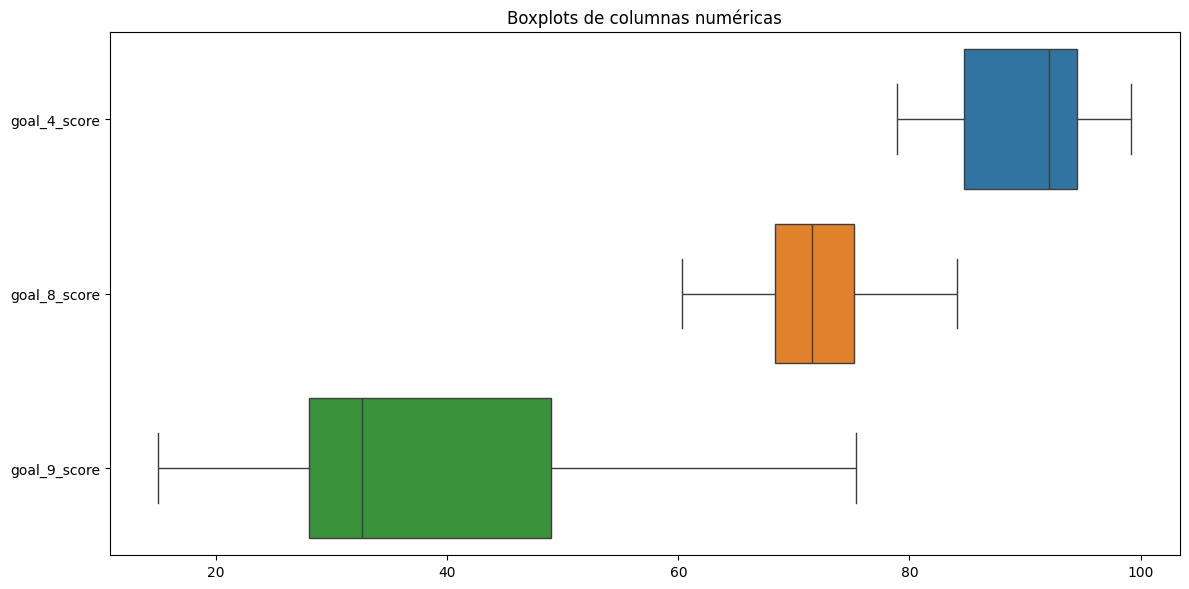

In [618]:
import seaborn as sns
import matplotlib.pyplot as plt
df_numerico = df_lac.select_dtypes(include='number')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numerico[['goal_4_score', 'goal_8_score','goal_9_score']], orient='h')  # horizontal
plt.title('Boxplots de columnas numéricas')
plt.tight_layout()
plt.show()

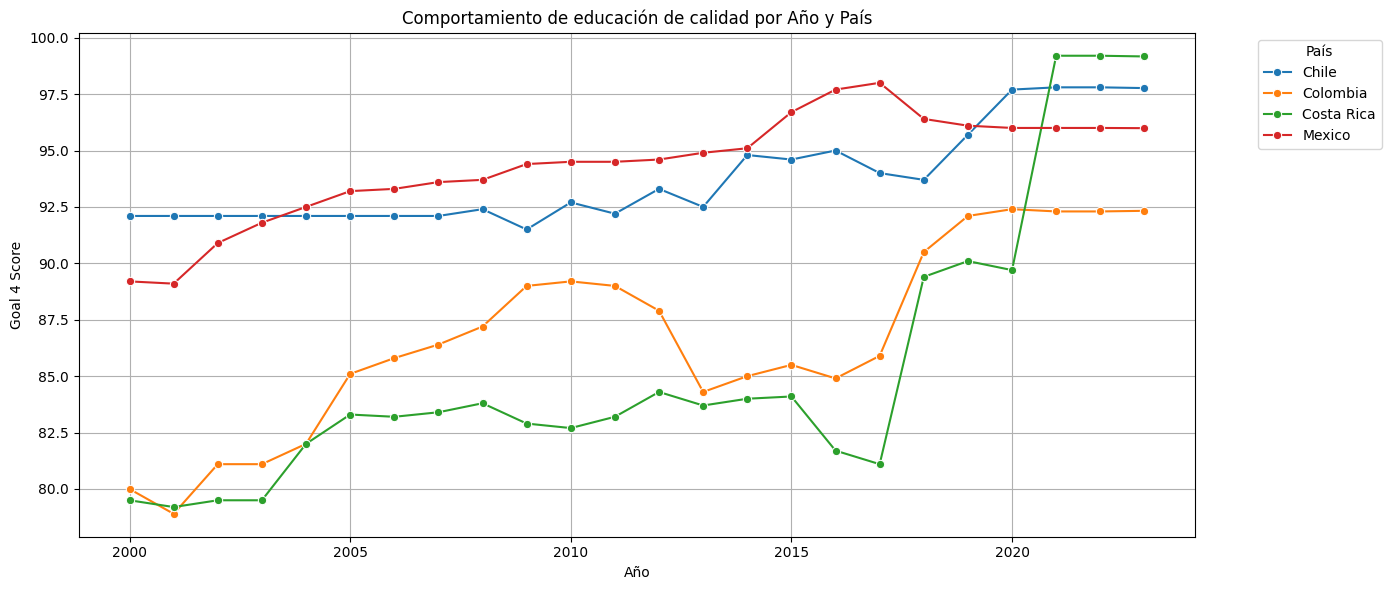

In [619]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de tener los datos en este formato:
# columnas: 'country', 'year', 'goal_4_score'

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_lac, x='year', y='goal_4_score', hue='country', marker='o')

plt.title('Comportamiento de educación de calidad por Año y País')
plt.xlabel('Año')
plt.ylabel('Goal 4 Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='País')
plt.grid(True)
plt.tight_layout()
plt.show()


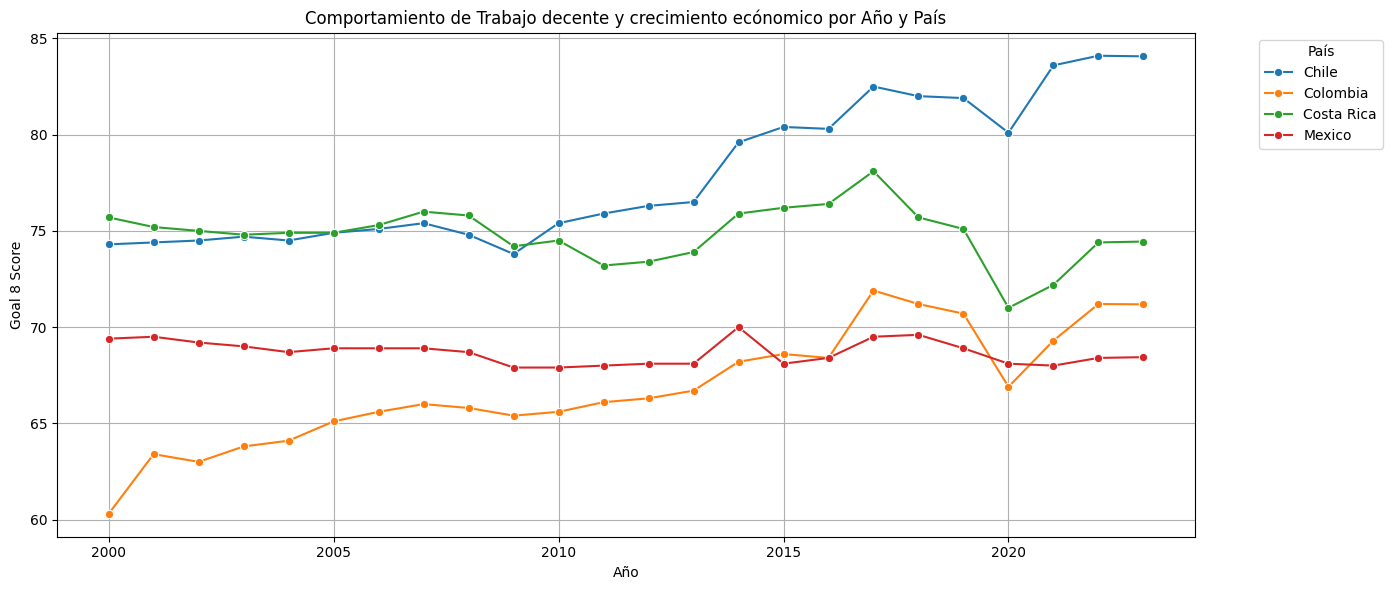

In [620]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_lac, x='year', y='goal_8_score', hue='country', marker='o')

plt.title('Comportamiento de Trabajo decente y crecimiento ecónomico por Año y País')
plt.xlabel('Año')
plt.ylabel('Goal 8 Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='País')
plt.grid(True)
plt.tight_layout()
plt.show()

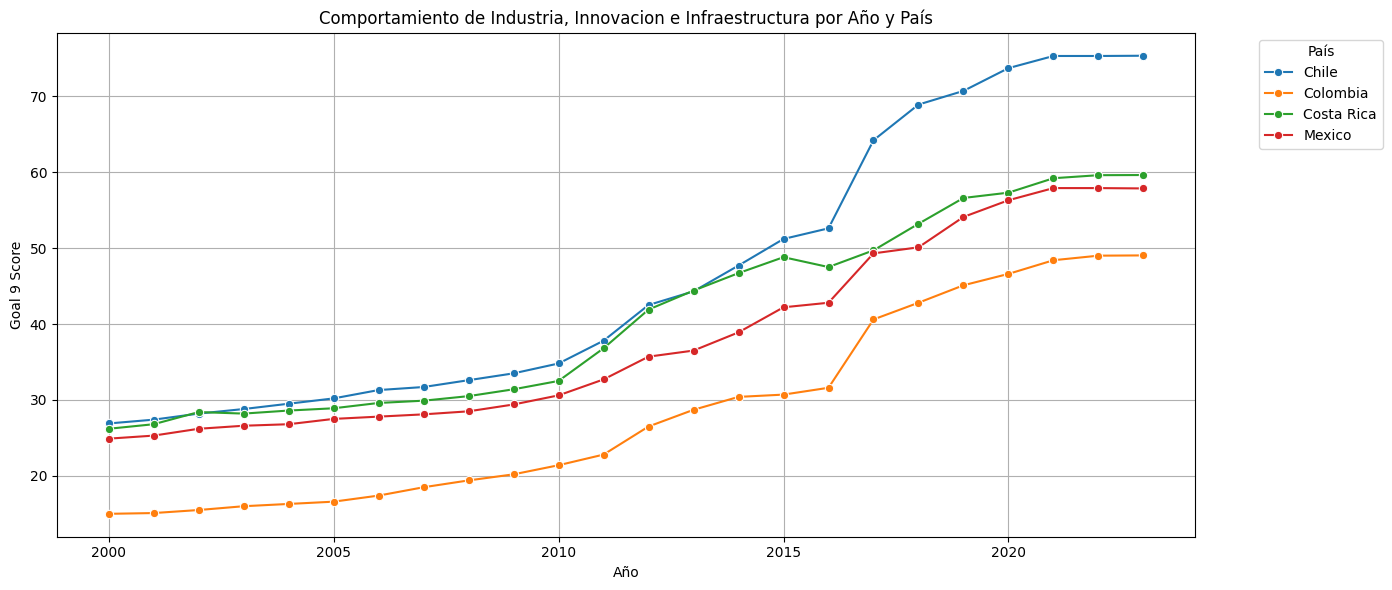

In [621]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_lac, x='year', y='goal_9_score', hue='country', marker='o')

plt.title('Comportamiento de Industria, Innovacion e Infraestructura por Año y País')
plt.xlabel('Año')
plt.ylabel('Goal 9 Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='País')
plt.grid(True)
plt.tight_layout()
plt.show()

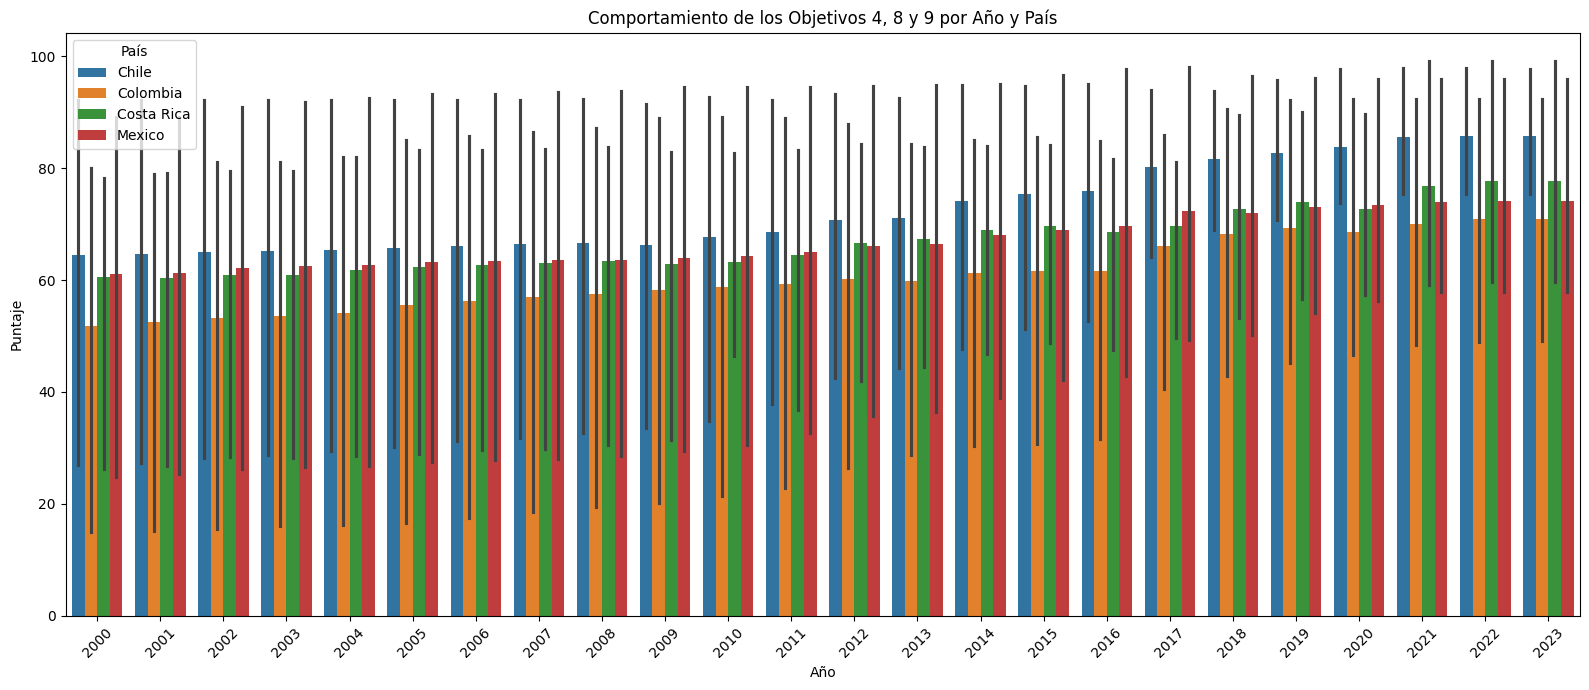

In [622]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los datos a formato largo
df_long = df_lac.melt(
    id_vars=['year', 'country'],
    value_vars=['goal_4_score', 'goal_8_score', 'goal_9_score'],
    var_name='goal',
    value_name='score'
)

# Crear gráfico de barras
plt.figure(figsize=(16, 7))
sns.barplot(data=df_long, x='year', y='score', hue='country')
plt.title('Comportamiento de los Objetivos 4, 8 y 9 por Año y País')
plt.xlabel('Año')
plt.ylabel('Puntaje')
plt.xticks(rotation=45)
plt.legend(title='País')
plt.tight_layout()
plt.show()


In [623]:
X = df_lac[['year', 'country_code']]

# Variable a predecir
y = df_lac['goal_9_score']

# One-hot encoding para la columna 'country_code'
X = pd.get_dummies(X, columns=['country_code'], drop_first=True)

# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 10.23904973225694
R2 Score: 0.9584304790333984


In [624]:
nuevo_dato = pd.DataFrame({
    'year': [2090],
    'country_code': ['COL']
})

# Hacer one-hot encoding igual que con los datos de entrenamiento
nuevo_dato_encoded = pd.get_dummies(nuevo_dato)

# Alinear columnas con las del entrenamiento
nuevo_dato_encoded = nuevo_dato_encoded.reindex(columns=X.columns, fill_value=0)

# Predecir
prediccion = model.predict(nuevo_dato_encoded)
print("Predicción para el nuevo dato:", prediccion[0])


Predicción para el nuevo dato: 51.117559999999976
